# Statescope basic tutorial

In this notebook, the basic functionality of the Statescope framework is demonstrated.\
We will perform deconvolution, refinement and state discovery on a bulk transcriptome dataset of PBMC samples using a predefined scRNAseq signature

In [3]:
import Statescope.Statescope as scope
import pandas as pd

In [5]:
# Read bulk dataset GSE263756
Bulk = pd.read_csv('https://github.com/tgac-vumc/StatescopeData/raw/refs/heads/main/Bulk/PBMC/GSE263756.txt', sep = '\t', index_col = 'Geneid')
Bulk.head(3)

,PBMC_0,PBMC_1,PBMC_2,PBMC_3,PBMC_4,PBMC_5,PBMC_6,PBMC_7,PBMC_8,PBMC_9,...,PBMC_36,PBMC_37,PBMC_38,PBMC_39,PBMC_40,PBMC_41,PBMC_42,PBMC_43,PBMC_44,PBMC_45
Geneid,,,,,,,,,,,,,,,,,,,,,
5S_rRNA,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7SK,2256,431,1391,77,1110,3182,586,993,2097,446,...,797,2536,2985,104,2878,975,65,463,75,474
A1BG,1,3,0,5,4,7,1,2,4,6,...,2,2,1,2,6,5,6,0,3,3


### Statescope initialization

The first step in the Statescope analysis is the initialization of the object. In this notebook we will intialize Statescope with an predefined scRNAseq PBMC signature of 7 cell types. The initialization matches the genes between the signature and bulk and makes sure the bulk is in the correct format.

In [7]:
Statescope_model = scope.Initialize_Statescope(Bulk, TumorType = 'PBMC', Ncelltypes = 7)

The supplied Bulk matrix is assumed to be raw counts. Library size correction to 10k counts per sample is performed.
Number of common markers between Bulk and Signature: 357
Number of genes common between Bulk and Signature: 18638


/net/beegfs/scratch/jjansen4/miniconda3/envs/emacs/lib/python3.11/site-packages/numpy/core/fromnumeric.py:3462: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


### Statescope deconvolution

The next step in the Statescope analysis is the deconvolution analysis. In this step, the intial optimization of the Statescope deconvolution module is performed. Here only marker genes are used and the cell fractions are estimated

In [8]:
Statescope_model.Deconvolution()

No prior knowledge of expected cell type fractions is given.
all of 357 genes are used for optimization.
Initialization with Support vector regression


[Parallel(n_jobs=10)]: Using backend ThreadingBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done   5 tasks      | elapsed:    0.7s
[Parallel(n_jobs=10)]: Done  12 tasks      | elapsed:    0.7s
[Parallel(n_jobs=10)]: Done  21 tasks      | elapsed:    0.7s
[Parallel(n_jobs=10)]: Done  32 out of  46 | elapsed:    0.8s remaining:    0.3s
[Parallel(n_jobs=10)]: Done  37 out of  46 | elapsed:    0.8s remaining:    0.2s
[Parallel(n_jobs=10)]: Done  42 out of  46 | elapsed:    0.8s remaining:    0.1s
[Parallel(n_jobs=10)]: Done  46 out of  46 | elapsed:    0.8s finished
[Parallel(n_jobs=10)]: Using backend ThreadingBackend with 10 concurrent workers.


No feature filtering is done (fsel = 0)
CUDA is not available. Using CPU for computation.


/net/beegfs/scratch/jjansen4/miniconda3/envs/emacs/lib/python3.11/site-packages/BLADE_Deconvolution/BLADE.py:967: Warning: No optimization is not done yet
  obj.Check_health()
/net/beegfs/scratch/jjansen4/miniconda3/envs/emacs/lib/python3.11/site-packages/BLADE_Deconvolution/BLADE.py:967: Warning: Zero or negative values in Beta0
  obj.Check_health()
[Parallel(n_jobs=10)]: Done   3 out of  10 | elapsed:   40.2s remaining:  1.6min
[Parallel(n_jobs=10)]: Done   5 out of  10 | elapsed:  1.4min remaining:  1.4min
[Parallel(n_jobs=10)]: Done   7 out of  10 | elapsed:  1.4min remaining:   37.3s
[Parallel(n_jobs=10)]: Done  10 out of  10 | elapsed:  1.6min finished


Deconvolution completed successfully.


### Statescope Refinement

The next step in the Statescope analysis is the Refinement analysis. In this step, all genes available in the signature are used to performed an additional optimization of the deconvolution. This step is introduced to capture more refined inter-sample variation in the gene expression profiles.

In [9]:
Statescope_model.Refinement()

[Parallel(n_jobs=10)]: Using backend LokyBackend with 10 concurrent workers.
/net/beegfs/scratch/jjansen4/miniconda3/envs/emacs/lib/python3.11/site-packages/BLADE_Deconvolution/BLADE.py:1840: Warning: No optimization is not done yet
  obj.Check_health()
/net/beegfs/scratch/jjansen4/miniconda3/envs/emacs/lib/python3.11/site-packages/BLADE_Deconvolution/BLADE.py:1840: Warning: No optimization is not done yet
  obj.Check_health()
/net/beegfs/scratch/jjansen4/miniconda3/envs/emacs/lib/python3.11/site-packages/BLADE_Deconvolution/BLADE.py:1840: Warning: No optimization is not done yet
  obj.Check_health()
/net/beegfs/scratch/jjansen4/miniconda3/envs/emacs/lib/python3.11/site-packages/BLADE_Deconvolution/BLADE.py:1840: Warning: No optimization is not done yet
  obj.Check_health()
/net/beegfs/scratch/jjansen4/miniconda3/envs/emacs/lib/python3.11/site-packages/BLADE_Deconvolution/BLADE.py:1840: Warning: No optimization is not done yet
  obj.Check_health()
/net/beegfs/scratch/jjansen4/miniconda

Refinement completed successfully.


### Statescope State Discovery

The final step in the Statescope analysis is the State Discovery. In this step, the refined cell type-specific gene expression profiles are weighted and subjected to unsupervised clustering analysis using convex-NMF. The output of this module is the StateScores (Sample x K) and StateLoadings (Gene x K) for each cell type. For each cell type, the number of k is automatically selected based on an heuristic approach.

In [10]:
Statescope_model.StateDiscovery()

[Parallel(n_jobs=10)]: Using backend LokyBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done   3 out of  10 | elapsed:   15.8s remaining:   36.8s
[Parallel(n_jobs=10)]: Done   5 out of  10 | elapsed:   16.1s remaining:   16.1s
[Parallel(n_jobs=10)]: Done   7 out of  10 | elapsed:   17.0s remaining:    7.3s
[Parallel(n_jobs=10)]: Done  10 out of  10 | elapsed:   17.4s finished
[Parallel(n_jobs=10)]: Using backend LokyBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done   3 out of  10 | elapsed:   12.8s remaining:   29.9s
[Parallel(n_jobs=10)]: Done   5 out of  10 | elapsed:   14.0s remaining:   14.0s
[Parallel(n_jobs=10)]: Done   7 out of  10 | elapsed:   14.2s remaining:    6.1s
[Parallel(n_jobs=10)]: Done  10 out of  10 | elapsed:   15.9s finished
[Parallel(n_jobs=10)]: Using backend LokyBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done   3 out of  10 | elapsed:   13.5s remaining:   31.6s
[Parallel(n_jobs=10)]: Done   5 out of  10 | elapsed:   13.8

StateDiscovery completed successfully.


### Statescope results and plotting functions

All results of the Statescope analysis are saved within the Statescope model (for example Statescope.Fractions, Statescope.GEX, Statescope.StateScores, Statescope.StateLoadings). In addition, we provide several functions for standard visualization of the results

In [19]:
# Extracting Statescope results
Statescope_model.Fractions.head()

,T_cells_CD8+,T_cells_CD4+,Monocytes,B_cells,NK_cells,T_cells_CD4-CD8-,Dendritic_cells
PBMC_0,0.172456,0.227061,0.066269,0.086938,0.284165,0.046614,0.116497
PBMC_1,0.171668,0.002963,0.319461,0.245724,0.073031,0.163020,0.024133
PBMC_2,0.138231,0.328969,0.090211,0.258192,0.117953,0.026747,0.039698
PBMC_3,0.261021,0.317394,0.025104,0.046077,0.292829,0.035945,0.021630
PBMC_4,0.332923,0.132061,0.096502,0.279147,0.046295,0.006589,0.106483


In [20]:
Statescope_model.GEX['B_cells'].head()

,A1BG,A1BG-AS1,A1CF,A2M,A2M-AS1,A2ML1,A2ML1-AS1,A2ML1-AS2,A3GALT2,A4GALT,...,ZW10,ZWILCH,ZWINT,ZXDA,ZXDB,ZXDC,ZYG11A,ZYG11B,ZYX,ZZEF1
PBMC_0,0.007043,0.014041,1.351317e-14,0.003844,0.001140,0.000002,0.000168,1.312760e-12,1.704831e-10,0.000799,...,0.073506,0.031911,0.031056,0.126024,0.297660,0.574552,0.00283,0.186187,1.246855,1.239371
PBMC_1,0.005008,0.019501,1.357789e-14,0.003853,0.001144,0.000002,0.000168,1.326475e-12,1.757960e-10,0.000799,...,0.084878,0.031812,0.029249,0.131533,0.321663,0.582131,0.00283,0.223859,1.309215,1.186735
PBMC_2,-0.001625,0.015976,1.329828e-14,0.003852,0.001133,0.000002,0.000168,1.316021e-12,1.579089e-10,0.000799,...,0.106690,0.047727,0.010198,0.123805,0.343302,0.497349,0.00283,0.271785,1.141305,1.242169
PBMC_3,0.009742,0.023988,1.353111e-14,0.003917,0.001157,0.000002,0.000168,1.311873e-12,1.613976e-10,0.000799,...,0.090008,0.044783,0.044258,0.126562,0.294855,0.571561,0.00283,0.240341,1.226871,1.211335
PBMC_4,0.003368,0.037051,1.345762e-14,0.003830,0.001148,0.000002,0.000168,1.316717e-12,1.865732e-10,0.000799,...,0.106702,0.032376,0.049130,0.117705,0.313715,0.562415,0.00283,0.307811,1.271127,1.199720


In [22]:
Statescope_model.StateScores.head()

,T_cells_CD8+_0,T_cells_CD8+_1,T_cells_CD8+_2,T_cells_CD8+_3,T_cells_CD4+_0,T_cells_CD4+_1,T_cells_CD4+_2,Monocytes_0,Monocytes_1,Monocytes_2,...,T_cells_CD4-CD8-_2,Dendritic_cells_0,Dendritic_cells_1,Dendritic_cells_2,Dendritic_cells_3,Dendritic_cells_4,Dendritic_cells_5,Dendritic_cells_6,Dendritic_cells_7,Dendritic_cells_8
PBMC_0,0.555089,0.437014,1.153497e-10,1.131036e-01,3.338667e-19,0.359975,1.242033,0.159946,0.140662,0.845229,...,0.236415,4.792224e-01,0.554130,0.264774,0.432400,1.651117,0.152629,0.358145,0.489556,0.003204
PBMC_1,0.161204,0.819739,4.972825e-02,1.249008e-01,1.958569e-02,0.067919,0.069888,0.081482,0.297513,1.435840,...,2.448512,1.566927e-01,0.717935,0.275614,0.000022,0.131644,0.042853,0.197515,0.123028,0.171821
PBMC_2,1.294734,1.326393,1.147229e+00,6.521197e-01,1.523380e+00,1.963294,4.614344,0.976132,0.041635,0.119356,...,0.173519,5.417387e-01,0.018748,0.343939,0.027000,0.068056,0.136324,0.514283,0.086405,0.983086
PBMC_3,0.125272,0.179518,7.205742e-01,4.492554e-10,6.251579e-01,0.000022,0.385380,0.090182,0.018084,0.067213,...,0.340419,1.708327e-07,0.054250,0.072887,0.150440,0.039997,0.034941,0.739618,0.046876,0.124643
PBMC_4,0.833193,1.336411,1.174425e+00,1.107226e+00,4.457976e-01,0.791240,0.650524,0.045654,0.244841,0.255688,...,0.008828,5.102668e-01,0.404905,0.799629,0.965448,0.000010,0.215671,0.193612,0.296492,0.406449


In [23]:
Statescope_model.StateLoadings.head()

,T_cells_CD8+_0,T_cells_CD8+_1,T_cells_CD8+_2,T_cells_CD8+_3,T_cells_CD4+_0,T_cells_CD4+_1,T_cells_CD4+_2,Monocytes_0,Monocytes_1,Monocytes_2,...,T_cells_CD4-CD8-_2,Dendritic_cells_0,Dendritic_cells_1,Dendritic_cells_2,Dendritic_cells_3,Dendritic_cells_4,Dendritic_cells_5,Dendritic_cells_6,Dendritic_cells_7,Dendritic_cells_8
A1BG,-1.153139e-04,1.917732e-04,-1.944963e-05,-1.195822e-04,1.778133e-05,1.067598e-04,-9.103693e-05,1.924213e-05,-1.446168e-04,-4.154163e-05,...,-6.252171e-05,-2.123035e-04,4.439939e-04,-5.839961e-04,3.190963e-04,-7.369828e-04,-1.826131e-03,3.462692e-04,-4.398353e-04,1.150449e-04
A1BG-AS1,-3.097688e-04,4.560092e-05,1.253560e-04,6.693891e-05,1.375141e-04,4.062552e-05,-9.164606e-05,-1.535096e-05,3.031581e-05,3.745826e-05,...,1.235116e-04,5.319903e-05,3.675332e-05,2.632404e-05,1.367010e-04,-1.803517e-04,-4.459218e-04,5.358949e-05,-5.354103e-05,-5.422213e-05
A1CF,3.762141e-21,-4.023738e-21,8.438313e-21,-2.107323e-21,6.147191e-16,-3.848509e-16,1.489230e-16,-3.409726e-21,-5.122007e-21,-5.545645e-21,...,5.178245e-22,1.045471e-21,-3.272498e-21,-2.737969e-21,-3.555992e-21,-3.128161e-21,5.899070e-20,-2.635581e-21,-2.333604e-21,-2.448160e-21
A2M,-1.912136e-06,-2.187581e-06,5.189962e-06,-1.545652e-06,3.008161e-07,-1.154597e-07,-5.335162e-08,-5.599623e-09,-3.732373e-09,-3.485812e-09,...,4.172773e-06,3.160439e-07,-2.684678e-07,-4.184852e-07,-3.753204e-07,-4.436463e-07,3.294991e-06,5.270292e-07,-1.554172e-07,-5.580318e-07
A2M-AS1,-5.976710e-04,5.279099e-05,5.793194e-04,-2.507537e-04,5.225873e-05,-9.124672e-06,-1.716663e-05,-1.289061e-07,-8.356096e-08,8.746494e-08,...,2.277578e-03,1.526672e-06,8.016969e-07,1.812025e-06,2.699217e-08,-5.350052e-06,-6.631527e-06,2.910732e-06,-1.520245e-06,-2.411637e-06


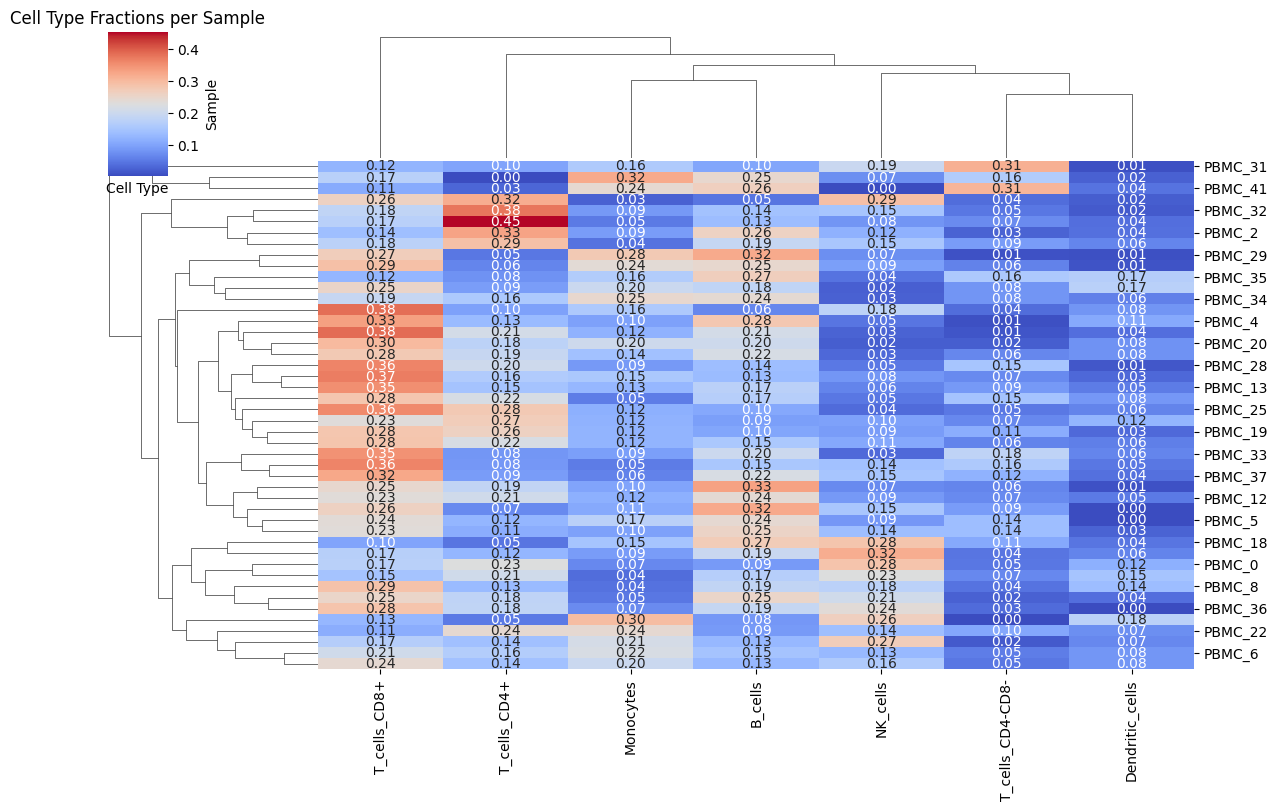

In [11]:
# Plot Heatmap of fractions
scope.Heatmap_Fractions(Statescope_model)

/net/beegfs/scratch/jjansen4/miniconda3/envs/emacs/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
/net/beegfs/scratch/jjansen4/miniconda3/envs/emacs/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


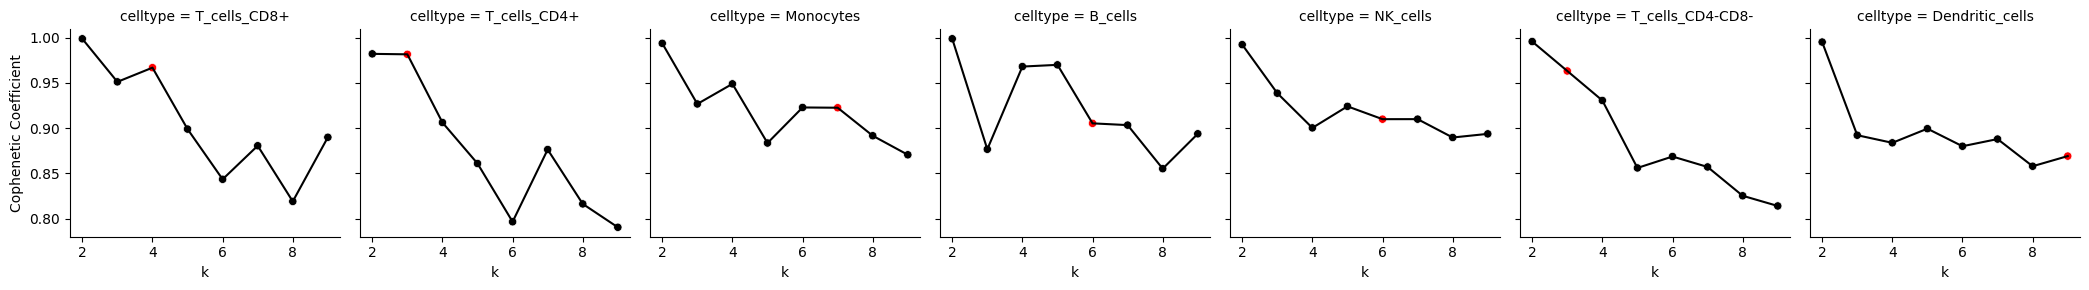

In [12]:
# Plot Cophentic coefficient plot used for determining k
scope.Plot_CopheneticCoefficients(Statescope_model)

StateLoadings matrix extracted successfully. Shape: (18638, 38)


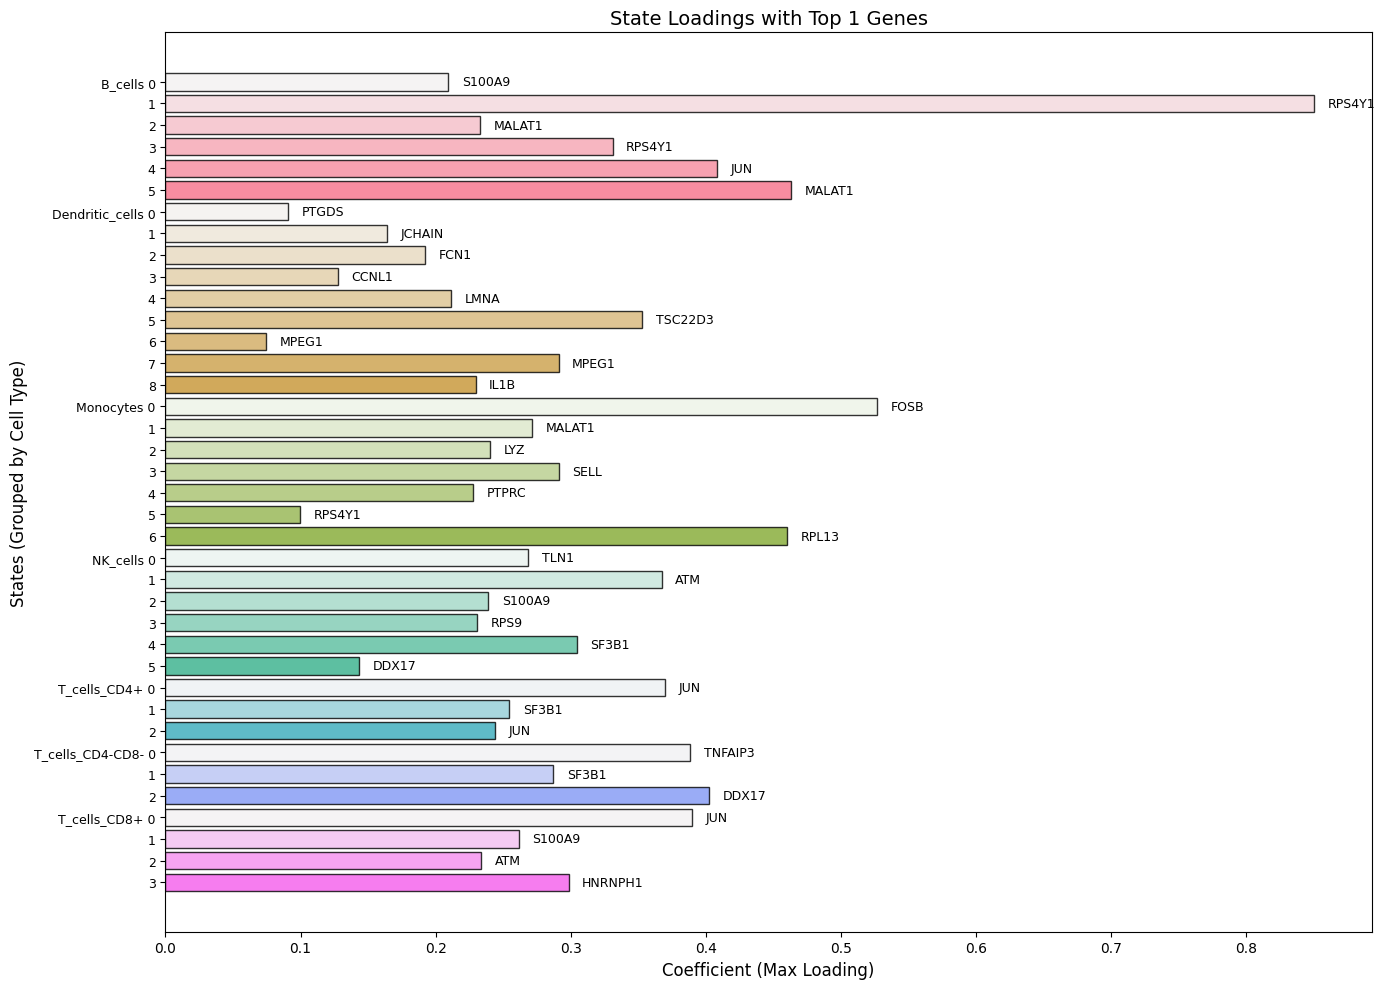

In [13]:
# Plot bar plot with top loadings per state
scope.BarPlot_StateLoadings(Statescope_model)